In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

## Loading Data

In [2]:
spambase = pd.read_csv("spam.csv")
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_/;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## Visualizing Data

In [3]:
description = spambase.describe()
description

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_/;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### Visualzing mean frequecies for words and caracters
We try to check for the most frequent words in our data set to guide us on which words may standout in determinning its class ('spam', 'non-spam')

#### Bar Chart Word Frequencies

<AxesSubplot:>

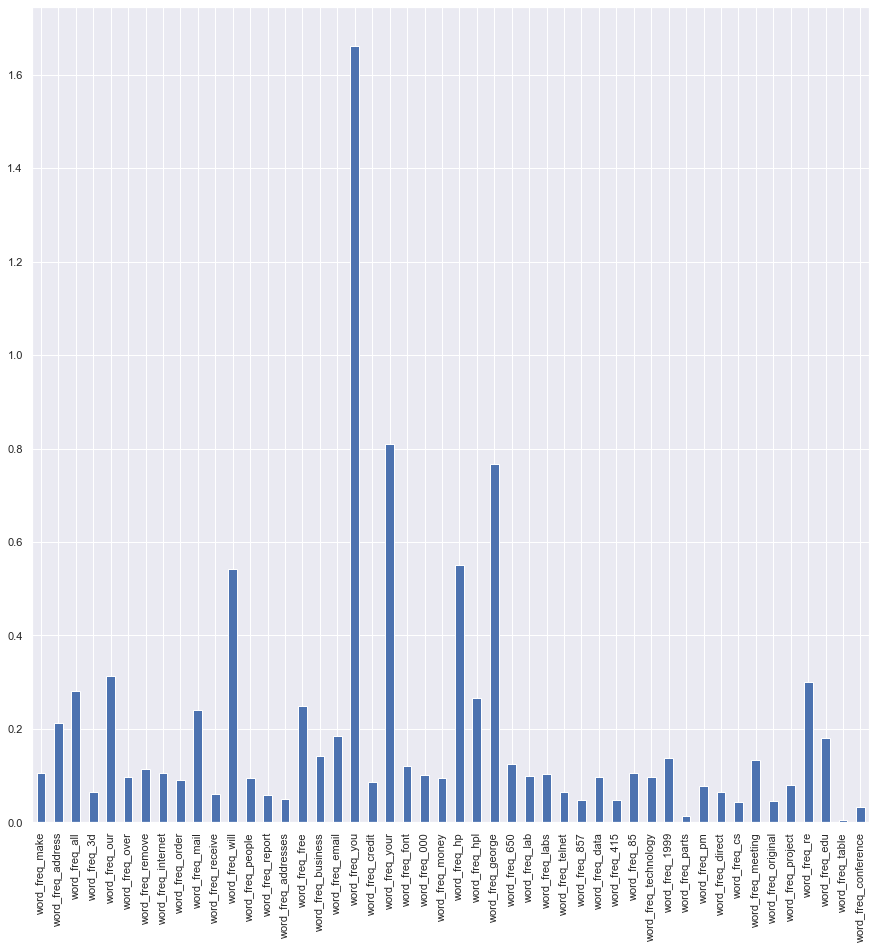

In [4]:
description.iloc[1, :48].plot.bar(figsize=(15,15))

#### Bar Chart Character Frequencies

<AxesSubplot:>

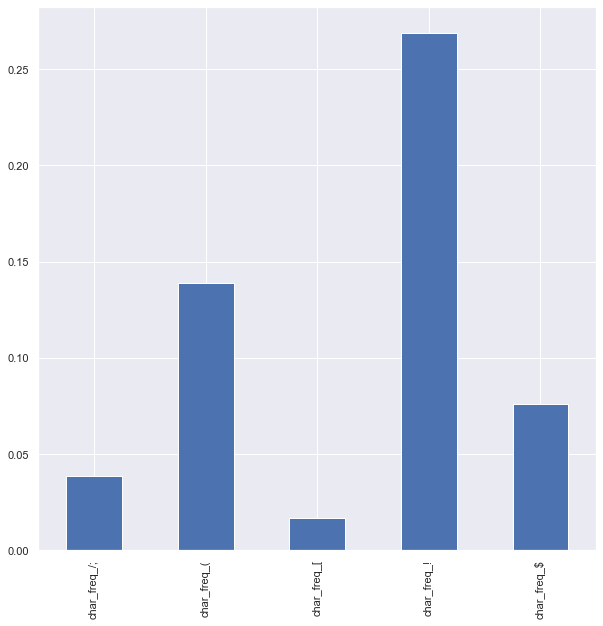

In [5]:
description.iloc[1, 48:53].plot.bar(figsize=(10,10))

### Visualzing Standard deviation of frequecies words and caracters
We try understand the dispersion in the frequencies of words/charts to know if its a good criteria for determinning theclass of the message. When words/characters have low variance it means their frequency in a message may not much affect the classs of a message beacause they are all packed together (both spam and non spam messages have approximaletly equal frequencies) while those with high variance may be much more useful in determining the class of the message

#### Bar Chart Word Frequencies

<AxesSubplot:>

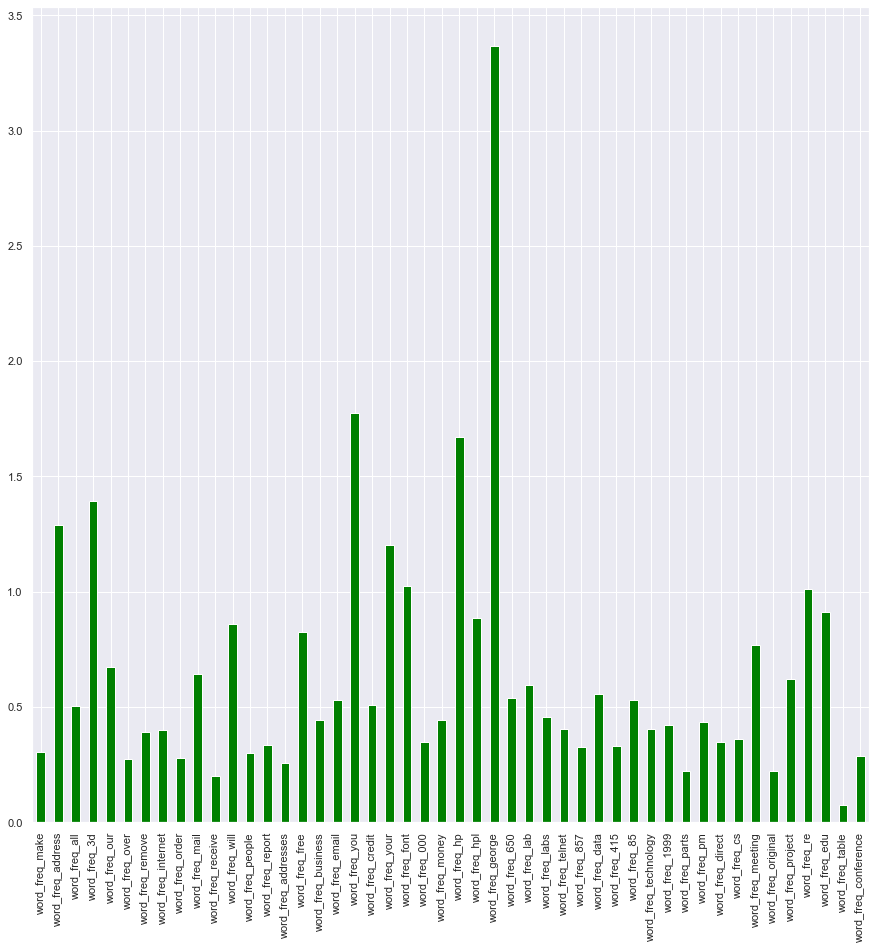

In [13]:
description.iloc[2, :48].plot.bar(color="green", figsize=(15,15))

#### Bar Chart Character Frequencies

<AxesSubplot:>

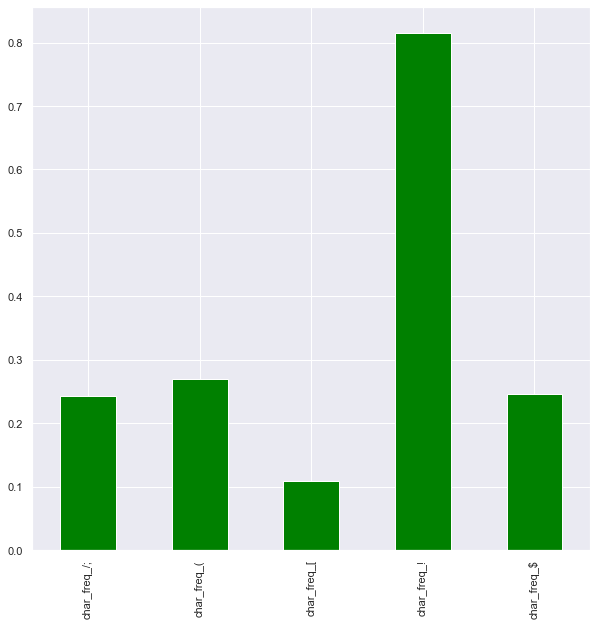

In [14]:
description.iloc[2, 48:53].plot.bar(color="green", figsize=(10,10))

## Creating Models

In [8]:
train, test = train_test_split(spambase, test_size=0.3, random_state=42, shuffle=True)
Xtrain = train.iloc[:, :-1]
Ytrain = train.iloc[:, -1]
clf = svm.SVC(kernel="linear")
clf.fit(Xtrain, Ytrain)
clf.support_vectors_

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.406e+00, 5.000e+00,
        4.500e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        4.000e+00],
       [8.000e-02, 1.600e-01, 8.000e-02, ..., 2.747e+00, 8.600e+01,
        1.995e+03],
       ...,
       [6.700e-01, 0.000e+00, 6.700e-01, ..., 3.384e+00, 3.700e+01,
        1.320e+02],
       [0.000e+00, 0.000e+00, 2.150e+00, ..., 2.333e+00, 1.900e+01,
        4.900e+01],
       [1.400e-01, 0.000e+00, 2.800e-01, ..., 1.867e+00, 1.400e+01,
        5.210e+02]])

## Testing Model

In [9]:
Xtest = test.iloc[:, :-1]
Ytest = test.iloc[:, -1]
predictions = clf.predict(Xtest)
#print(predictions)
pd.DataFrame(confusion_matrix(Ytest, predictions))

,0,1
0,753,50
1,68,509


## Evaluating Model

In [10]:
precision = precision_score(Ytest, predictions)*100
recall = recall_score(Ytest, predictions)*100
print(f"precision: {precision:.2f}%")
print(f"recall: {recall:.2f}%")

precision: 91.06%
recall: 88.21%


In [11]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}